In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization
from sklearn.cluster import KMeans

In [2]:
def weightedAvg(data):
    rdata = pd.DataFrame()
    for player in set(data.pid):
        p= data[data['pid'] == player]
        ser = len(p)
        p = p.drop(['pid', 'series_code'], axis = 1 )
        p = pd.DataFrame(p.mean(axis = 0))
        p = p.swapaxes('index', 'columns')

        p.insert(0, 'pid', player)
        p.insert(0, 'series_played', ser)
        rdata = rdata.append(p)
    return rdata

In [3]:
# df = pd.read_csv('playerIR02.csv')[:]
df = pd.read_csv('playerIR21.csv')[:]
df = weightedAvg(df)

In [4]:
df.shape

(1360, 6)

In [5]:
df = df.reset_index().drop(['index'], axis=1)
df.head()
df.shape

(1360, 6)

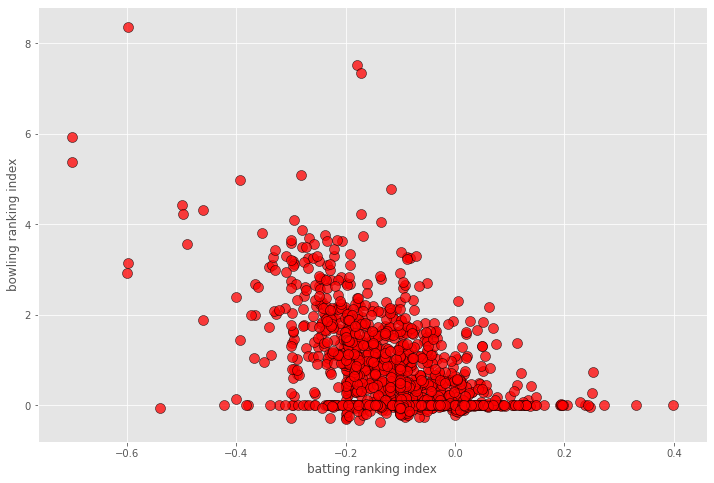

In [14]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.style.use('ggplot')
plt.scatter(df.batRI, df.bowlRI, s = 100, c = 'red', edgecolor = 'black', linewidth = .6, alpha = .75)
plt.xlabel('batting ranking index')
plt.ylabel('bowling ranking index')


# plt.figure(num=None, figsize=(4000, 4000))
plt.show()

In [15]:
kmeans = KMeans(n_clusters=5)

In [16]:
kmeans.fit(df[['batRI', 'bowlRI']])
df['clusterRI'] = kmeans.predict(df[['batRI', 'bowlRI']])
df1 = df

In [17]:
# df1 = df[df['clusterRI'] == 0]

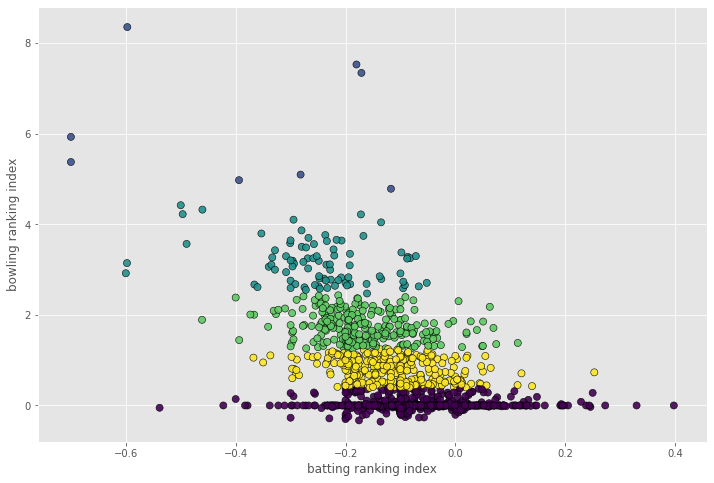

In [18]:
fig = plt.gcf()
fig.set_size_inches(12, 8)

plt.scatter(df1.batRI, df1.bowlRI, c = df1['clusterRI'] , s=50 ,edgecolor = 'black', linewidth = .6 ,alpha = .9)
plt.xlabel('batting ranking index')
plt.ylabel('bowling ranking index')

centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c = 'white', s=150, alpha=.5);

# plt.xscale('linear')
# plt.yscale('linear')
plt.show()



In [11]:
# df.to_csv('clustered1tttt.csv', index=False)

In [12]:
df[df['clusterRI'] == 4]

,series_played,pid,batAGR,batRI,bowlAGR,bowlRI,clusterRI
172,1,777.0,-92.866667,-0.281794,1618.585455,5.097015,4
189,1,867.0,-224.617647,-0.597341,3013.830469,8.354687,4
308,1,1413.0,-129.822222,-0.393931,1579.800000,4.974878,4
505,1,2068.0,-255.775281,-0.700000,2102.877065,5.930167,4
536,1,2105.0,-39.666667,-0.117241,1559.574305,4.784669,4
665,1,2672.0,-341.363636,-0.700000,2564.107716,5.375342,4
994,1,3638.0,-54.233766,-0.180078,2217.414484,7.528259,4
1251,1,4414.0,-53.166667,-0.171046,2233.333333,7.342466,4


In [22]:
df[['pid', 'batRI', 'bowlRI', 'clusterRI']].to_csv('clustered02.csv', index = False)